<a href="https://colab.research.google.com/github/youse0ng/pytorch_practice/blob/main/01_pytorch_workflow_video.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pytorh Workflow

Let's explore a an example Pytorch End-to-end workflow

In [ ]:
what_were_covering={1:"data (prepare and load)",
                    2: "build model",
                    3: "fitting the model to data (training)",
                    4: "making predictions and evaluting a model (inference)",
                    5: "saving and loading a model",
                    6: "putting it all together"}

what_were_covering

In [ ]:
import torch
from torch import nn # nn contains all of Pytorch's building blocks for neural networks.

import matplotlib.pyplot as plt

#check Pytorch Version
torch.__version__

## 1. Data (Preparing and loading)

Data can be almost anything ... in machine learning

*Excel Speadsheet (행과 열을 지닌 정형 데이터)

*Images of any kind

*Videos (Youtube has lots of data...)

*Audio like songs or podcasts

*DNA

*Text

Machine Learning is a game of two parts:
1. Get data into a numerical representation
2. Build a model to learn patterns in that numerical representation

데이터를 수치화 -> 수치화된 표현을 통해 모델이 패턴(features/weights)을 학습한다.

To showcase this, let's create some *known* data using the linear regression formula


We'll use a linear regression formula to make a straight line with *known* **parameters**.


In [ ]:
# Create *known* parameters

weight=0.7
bias=0.3

# Create
start=0
end=1
step=0.02
X=torch.arange(start,end,step).unsqueeze(dim=1) # Input data(training data)
y=weight * X+bias

X[:10], y[:10]

### Splitting data into training and test sets(one of the most important concepts in machine learning in general)

Training, Validation, test
1. Training: 60~80%
2. Vailidation: 10~20%
3. Test:10~20%

validation set는 항상 필요한 것은 아니다.

Let's create a training and test set with our data.



In [ ]:
# Create a train/test split

train_split=int(0.8*len(X)) # X의 길이는 50이다. torch.arange(0,1,0.02)
train_split  #40
X_train, y_train=X[:train_split],y[:train_split] #40까지 전부 소환

X_test,y_test=X[train_split:],y[train_split:] #40부터 끝까지 소환

len(X_train), len(y_train),len(X_test),len(y_test)

How might we better visualize our data?
(어떻게 하면 우리가 데이터를 시각화를 더 잘할 수 있을까?)

This is where the data explorer's motto comes in

"Visualize,Visualize,visualize!"

In [ ]:
def plot_predictions(train_data=X_train,
                    train_labels=y_train,
                    test_data=X_test,
                    test_labels=y_test,
                    predictions=None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10,7))

  #Plot training data in blue
  plt.scatter(train_data,train_labels,c="b",s=4,label="Training data")

  # Plot test data in Green
  plt.scatter(test_data,test_labels,c="g",s=4,label="Testing data")

  # Are there predictions?
  if predictions is not None:
    #plot the prediction if they exist
    plt.scatter(test_data,predictions,c="red",s=4,label="Predictions")

  #show the legend
  plt.legend(prop={"size":14});

In [ ]:
plot_predictions()

## 2. Build a model

Our first Pytorch Model

This is Very Exciting


What our model does:
* Start with random values(weight & bias)
* Look at training data and adjust the random values to better represent(or get closer to) the ideal values (the weight and bias values we used to create the data)

How does it to so?

Through two main algorithms:
1. Gradient descent
2. Backpropagation

In [ ]:
from torch import nn
# Linear Regression (Y=a+bX)
# Create linear regression model class
# nn.module 이라는 레고를 차곡 차곡 쌓으면서 점점 더 복잡한 신경망을 만들 수 있다.
class LinearRegressionModel(nn.Module): # almost everything in Pytorch inherits from nn.module 상속받음
  def __init__(self): # 그리고 항상 반드시 임의의 난수로 매개변수를 초기화할 필요는 없다. 0도 상관없다.
    super().__init__() #위 nn.module의 def __init__ 에 선언된 것을 상속받음
    self.weights = nn.Parameter(torch.randn(1, # <-Start with a random weight and try to adjust it to the ideal weights
                                            requires_grad=True, #<= Can this parameter be updated via gradient descent?
                                            dtype=torch.float)) #<= Pytorch loves the datatype torch.Float32

    self.bias=nn.Parameter(torch.randn(1, #<-Start with a random bias and try to adjust it to the ideal weights
                                       requires_grad=True, #<-Can this parameter be updated via gradient descent?
                                       dtype=torch.float)) #<-Pytorch loves the datatype torch.Float32
  #Forward method to define the computation in the model
  def forward(self, x:torch.Tensor) -> torch.Tensor:# <- "x"is the input data # 포워드 함수에서 재 정의를 해줘야지 모델이 학습할 때 그 방향으로 학습
     return self.weights * x +self.bias # this is the linear regression formula

### Pytorch model building essentials

* torch.nn - contains all of the building blocks for computational graph (another word for neural networks)
* torch.nn.Parameter- what parameters should our model try and learn, often a pytorch layer from torch.nn will set these for us
* torch.nn.Module -The base class for all neural network modules, if you subclass it , you should overwrite forward()
* torch.optim - this where the optimizers in Pytorch live, they will help with gradient descent
* def forward() -ALL nn.Module subclasses require you to overwrite forward(),this method defines what happens in the forward computation


### Checking the contents of our Pytorch model

Now we've created a model, let's see what's inside...

so we can check our model parameters or what's inside our model using '.parameters()'.

In [ ]:
import torch
# Create a random seed
torch.manual_seed(42)

# Create an instance of the model (this is a subclass of nn.module)
model_0=LinearRegressionModel()

# Check out the parameters
list(model_0.parameters())

In [ ]:
# List named parameters

model_0.state_dict()

In [ ]:
weight,bias

### Making prediction using 'torch.inference_mode()'

예측하기 위해서 torch.inference_mode()를 써라

to check our model's predictive power, let's see how well it predicts 'y_test' based on 'x_test'

When we pass data through our model, it's going to run it through the 'forward()' method

In [ ]:
X_test,y_test

In [ ]:
y_preds=model_0(X_test)
y_preds

In [ ]:
# make predictions with model

with torch.inference_mode(): # gradient 추적을 끕니다. require_grads=False 추론을 할때 훈련을 하지않기때문에, 그래디언트를 추적할 필요가없다.
  y_preds=model_0(X_test)  # 데이터셋이 커지면 예측하는 속도가 훨씬 더 빨라진다. 인퍼런스 모드를 사용했을

#위 torch.inference_mode()와 유사한 기능, 하지만, inference_mode를 선호해라.
#with torch.no_grad():
# y_preds=model_0(X_test)

y_preds

In [ ]:
y_test

In [ ]:
plot_predictions(predictions=y_preds)

### 3. Train model

The whole idea of training is for a model to move from some *unknown* parameters (these may be random) to some *known* parameters

in other words from a poor representation of the data to a better representation of the data.

One way to mearsure how poor or how wrong your models predictions are is to use a 'loss function'

* Note: Loss function may also be called cost function or criterion in different areas. For our case ,we're going to refer to it as a loss function.

Thing we need to train:

* **Loss function:** A function to measure how wrong your model's predictions are to the ideal outputs, lower is better.

* **Optimizer:** Takes into account(고려하다) the loss of model and adjust the model's parameters (weight & bias) to improve the loss function

function

* inside the optimizer you'll often have to set two Parameters:
  * params - the model parameters you'd like to optimize, for example 'params = model_0.parameters()'
  *lr(learning rate) - the learning rete is a hyperparameter that defines how big/small the optimizer changes the parameters with each step (a small lr results in small changes, a large lr results in large changes)

And specifically for Pytorch, we need:
* A training loop
* A testing loop



In [ ]:
list(model_0.parameters())

In [ ]:
#check out our model's parameters (a parameter is a value that the model sets itself)
model_0.state_dict()

In [ ]:
# Setup a loss function
loss_fn = nn.L1Loss() # MAE Loss function

# Setup an optimizer (ADAM ,SGD) (Stochastic gradient descent)
optimizer=torch.optim.SGD(params=model_0.parameters(),# 안에 인수로 매개변수를 받아들여야한다.
                          lr=0.01) #lr=learning rate= possibly the most important hyperparameter you can set


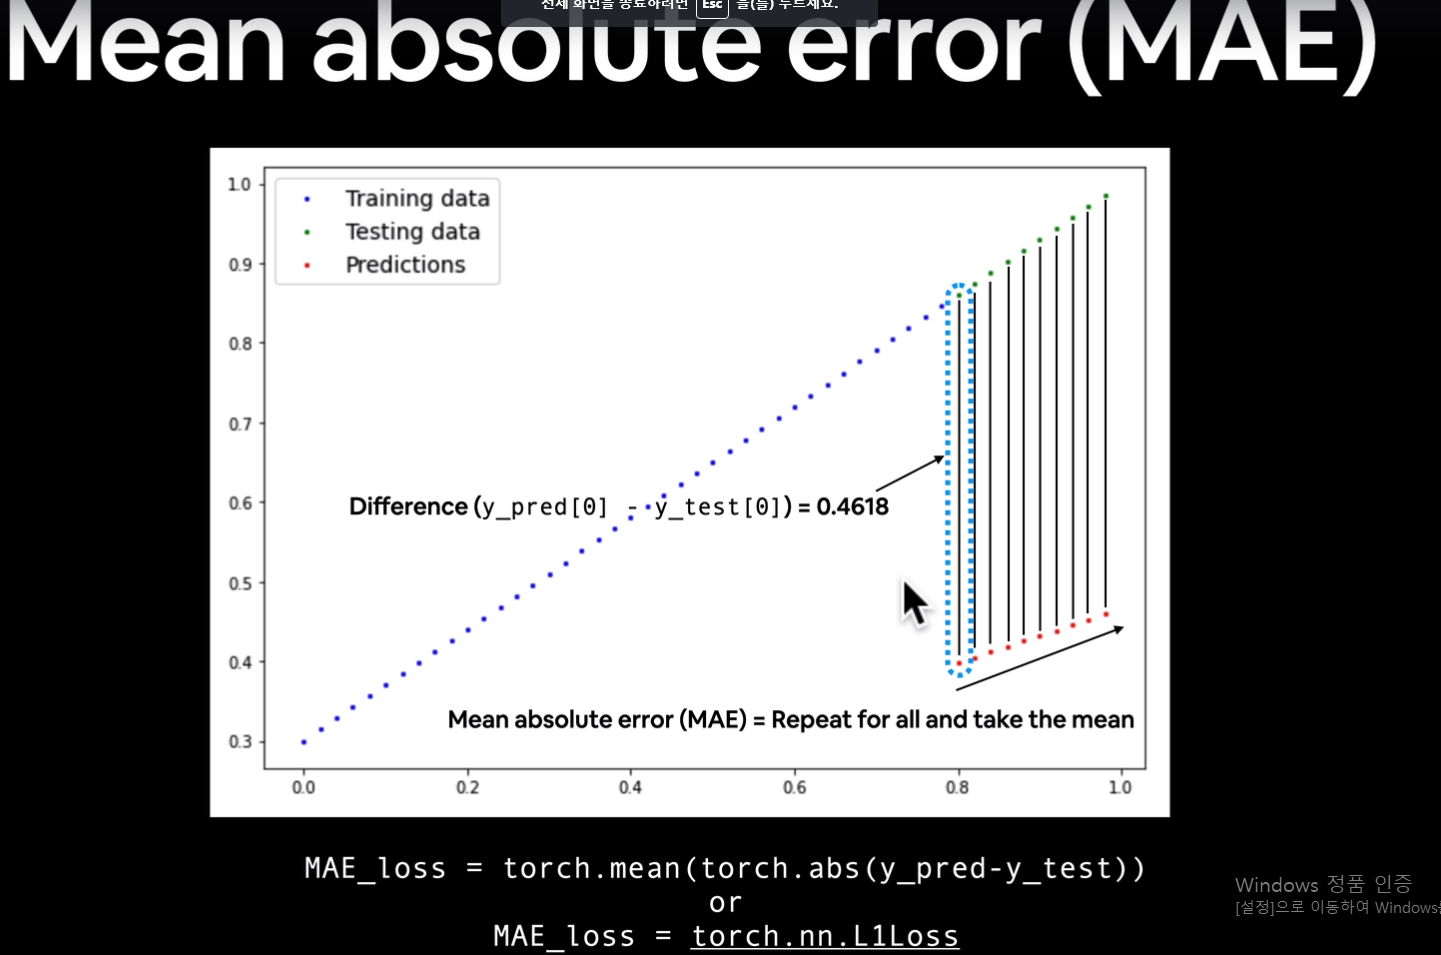

In [ ]:
loss_fn

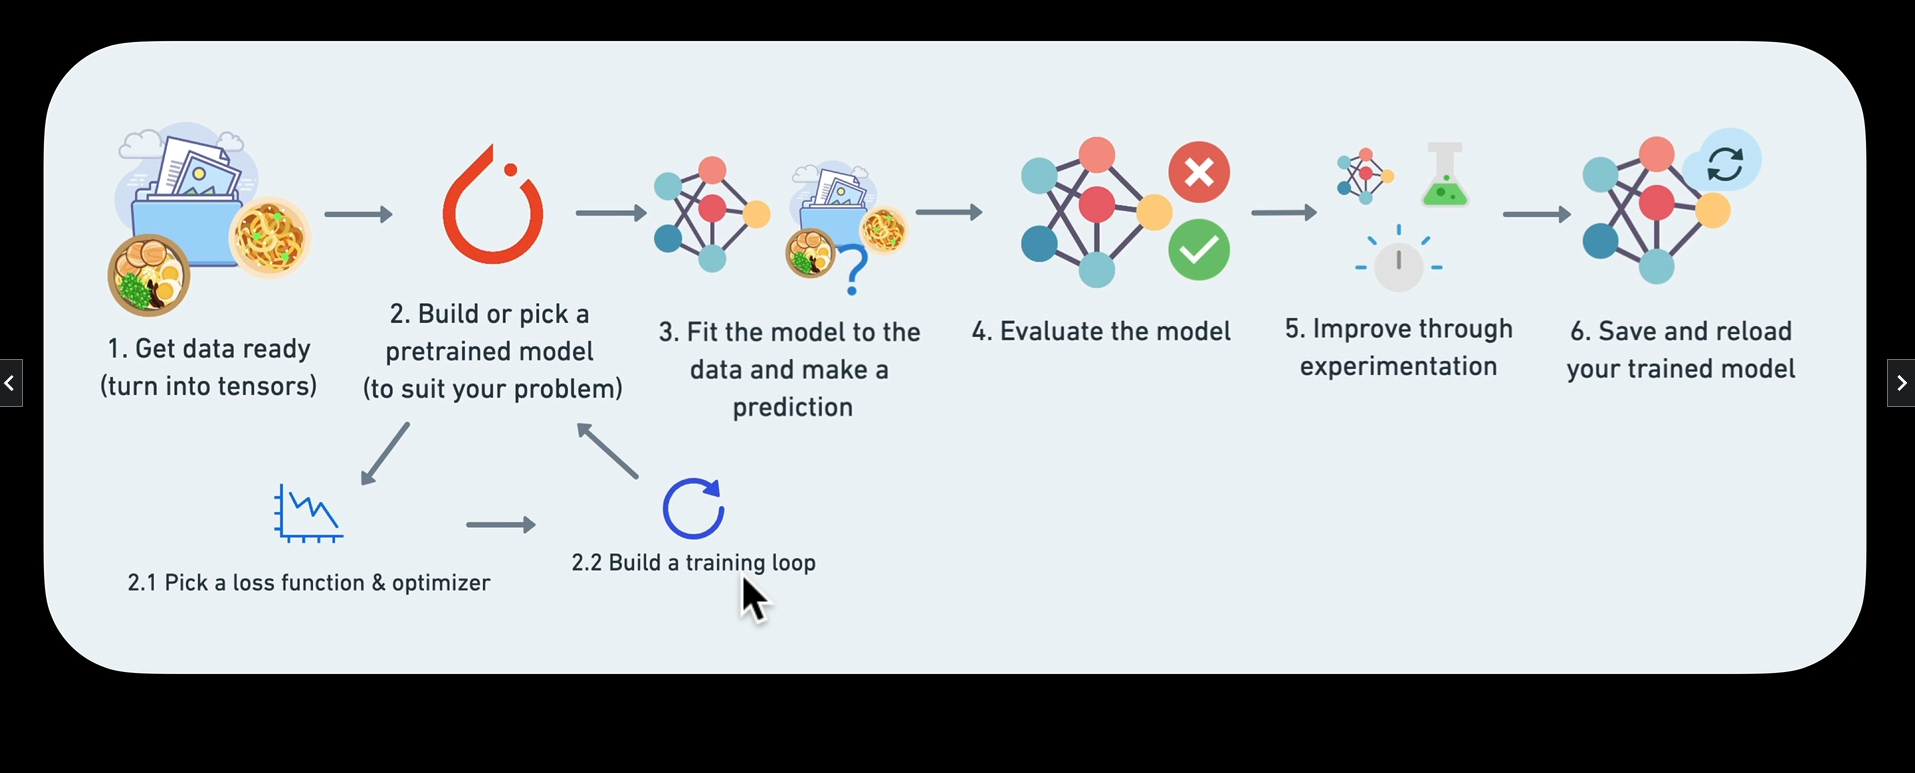

### Building a training loop(and a testing loop) in Pytorch

A couple of thing we need in a training loop:
0. Loop through the data and do...
1. Forward pass (this involves data moving through our model's 'forward()' function) to make predictions on data -also called forward propagation
2. Calculate the loss (compare forward pass predictions to ground truth labels)
3. Optimizer zero grad
4. Loss backward - move backwards through the networks to calculate the gradients of each of the parameters of our model with respect to the loss (**BackPropagation**)
5. Optimizer step - use the optimizer to adjust our model's parameters to try and improve the loss(**gradient descent**)

In [ ]:
# An epochs is one loop through the data...(this is a hyperparameter because we've set it ourselves)
torch.manual_seed(42)
epochs=200

#Track different values
epoch_count=[]
loss_values=[]
test_loss_values=[]

### Training
# 0. loop through the data
for epoch in range (epochs): # 트레이닝 루프
  # Set the model to training mode
  model_0.train() # train mode in Pytorch sets all parameters that require gradient to require gradients

  # 1. Forward pass  # 포워드 패스, 학습 데이터 순방향 전달 훈련데이터의 패턴을 학습한다.
  y_pred=model_0(X_train)

  # 2. Calculate the loss
  loss=loss_fn(y_pred,y_train) #(Input,target) 예측값먼저, 정답값 나중
  # 3. Optimizer zero grad
  optimizer.zero_grad()  # 제로 그레디언트는 왜할까?

  # 4. Perform backpropagation on the loss with respect to the parameters of the model
  loss.backward()

  # 5. Step the optimizer (Perform gradient descent)
  optimizer.step()

  ### Tesing
  model_0.eval() # turns off different settings in the model not needed for evaluating/testing (Dropout/batch norm layers)
  # 추론 모드로 설정하는 메서드 훈련 모드일때와 추론할때의 동작이 다르기 때문에, 모델을 추론 모드로 전환하는 것이 중요하다.

  with torch.inference_mode(): # turns off gradient tracking & a couple more things behind the scenes
    # 1. Do the forward pass
    test_pred=model_0(X_test)

    # 2. Calculate the loss
    test_loss=loss_fn(test_pred,y_test)
  if epoch % 10==0:
    epoch_count.append(epoch)
    loss_values.append(loss)
    test_loss_values.append(test_loss)
    print(f"Epoch: {epoch} | loss:{loss} | Test loss: {test_loss}")
    print(model_0.state_dict())

In [ ]:
model_0.state_dict()

In [ ]:
model_0.state_dict()

In [ ]:
weight,bias

In [ ]:
# Plot the loss curves
import numpy as np
plt.plot(epoch_count,np.array(torch.tensor(loss_values).numpy()),label="train loss")
plt.plot(epoch_count,test_loss_values, label="test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()

In [ ]:
with torch.inference_mode():
  y_preds_new=model_0(X_test)

In [ ]:
plot_predictions(predictions=y_preds_new)

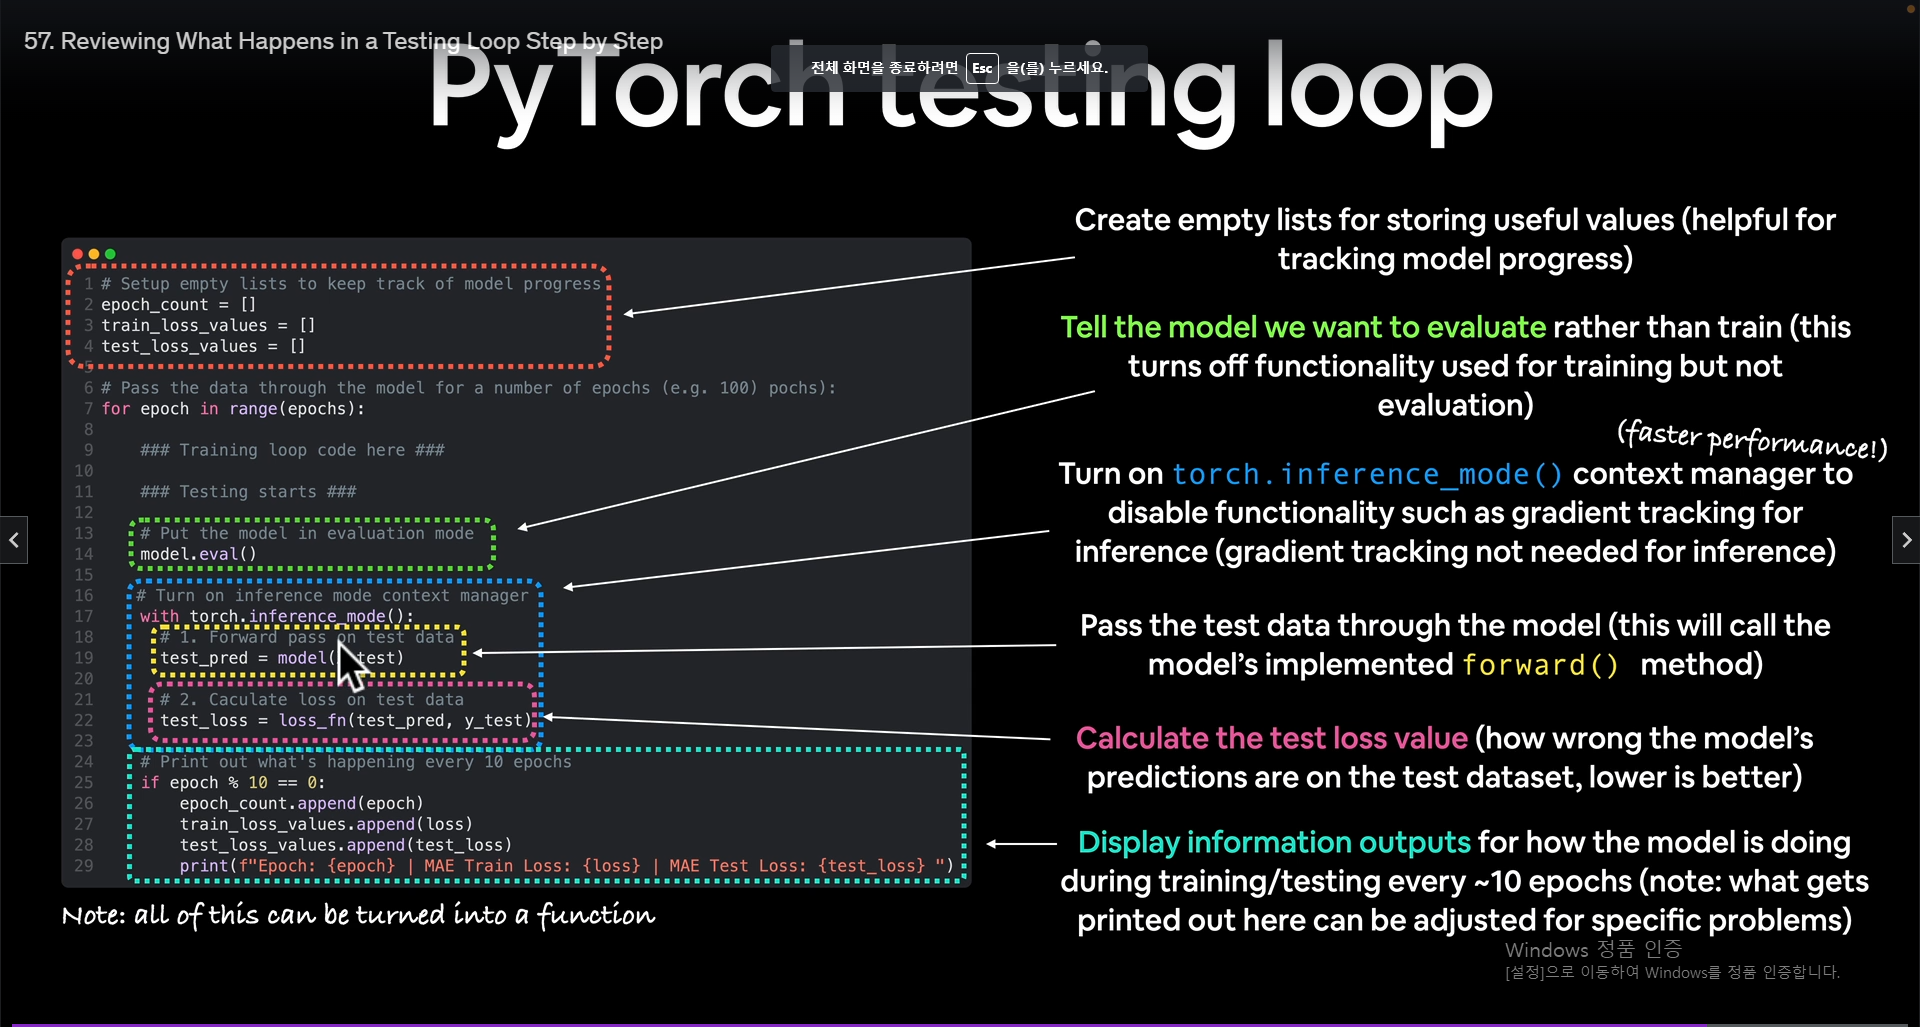


* 처음 빨간색 네모
  * 유용한 값을 저장하기 위한 빈리스트를 만든다. plt.plot 을 이용해서 Loss curve 를 시각화하기 위해서

* 초록색 네모
  * 훈련 모드를 실행하고 어느 정도 학습이 진행되었다면 Eval을 진행한다. eval()이 훈련모드에서 평가모드로 전환하는 메소드이다.
  * 드롭 아웃이나 배치 노멀화 레이어를의 기능을 끈다.

*  torch.inference_mode()는 더 빠른 퍼포먼스를 위해서 키는 기능이다. 꼭 필요한 건 아니지만 키는게 좋다.
  * 추론을 위한 gradient tracking 같은 기능을 무력화하기때문에 성능이 빨라짐.
  * 실제 테스트 환경에서 얼마나 트레이닝을 통한 weight와 bias 값들이 얼마나 새로운 데이터에도 잘 반영되는가에대해
  테스트를 진행하는데 여기서 gradient의 트랙킹은 할 필요가 없으므로 tracking 기능을 꺼주는 메소드 같다.
  훈련할때만 gradient tracking을 한다.

* 노란색 네모 pass the test data through the model forward pass
  * 테스트 데이터를 훈련 데이터처럼 모델에 통과시켜준다.

* 빨간색 네모칸
  * calculate testing loss value (테스트 손실값을 계산하고 테스트 데이터 집합에서 모델의 예측이 얼마나 잘 되었는지 안되었는지 판단. 낮으면 낮을 수록 좋음)
* 하늘색 네모칸
  epoch 마다 이제 progress 를 좀 보고 싶을때 저렇게 한다. 꼭 저렇게 할 필요는 없지만 예시같은 개념으로 생각하자.
  

## Saving a model(State_dict()) in Pytorch

There are three main methods you should know about for saving and loading models in Pytorch

1. 'torch.save()' - allows you save a Pytorch object in Python's pickle format

2. 'torch.load()' - allow you load a saved Pytorch object

3. 'torch.nn.Module.load_state_dict()' - this allows to load a model's saved state dictionary


In [ ]:
model_0.state_dict()

# 파이토치의 장점 중 하나 : 매개 변수를 파이썬 딕셔너리에 저장한다는 점.
# 지금은 2개 밖에없지만 나중에는 수백만개가 될 수 있다.
#state_dict는 PyTorch 모델 객체의 핵심 매개변수(parameter)들을 저장하는 Python 사전(dictionary) 객체입니다.

In [ ]:
# Saving our Pytorch model

from pathlib import Path  # 파일 경로 작성하기 다루기에 대한 python 모듈


# 1. Create models directory (모델 디렉토리 생성) 수작업으로 이제 폴더를 생성을 할 수 있지만 코딩으로도 된다.
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True,exist_ok=True)

# 2. Create model save path
MODEL_NAME="01_pytorch_workflow_model_0.pth" #모델 저장은 pt, pth 형태로 저장
MODEL_SAVE_PATH=MODEL_PATH/ MODEL_NAME

MODEL_SAVE_PATH

# 3. Save the model state dict
print(f"Saving model to : {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(),
           f=MODEL_SAVE_PATH)


torch.load() 메서드는 파일에서 state_dict 또는 전체 모델을 로드하는 데 사용되는 PyTorch 함수입니다. 저장된 모델의 파라미터들을 메모리에 로드하여 재사용하거나, 다른 모델에 파라미터를 전달하는 데 유용합니다.

## Loading a pytorch model(State_dict())

Since we saved our model's 'state_dict()' rather than the entire model, we'll create a new instance of our model class and load the saved 'state_dict()' into that.

우리가 전체 모델 대신 매개변수를 저장했으니까, 모델 클래스의 인스턴스를 생성하고 저장된 매개변수를 그 모델 안에 넣어 줄 것이다.

In [ ]:
model_0.state_dict()

In [ ]:
# To load in a saved state_dict we have to instantiate a new instance of our model class

loaded_model_0 = LinearRegressionModel()

# Load the saved state_dict of model_0 (this will update the new instance with updated parameters)
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))


In [ ]:
loaded_model_0.state_dict()

In [ ]:
# Make some predictions with our loaded model

loaded_model_0.eval()
with torch.inference_mode():
  loaded_model_preds=loaded_model_0(X_test)

loaded_model_preds


In [ ]:
# Make some models preds
model_0.eval()
with torch.inference_mode():
  y_preds=model_0(X_test)


In [ ]:
# compare loade model preds with original model preds

y_preds==loaded_model_preds

## 6. Putting it all together

Let's go back through the steps above and see it all in one place.



In [ ]:
import torch
from torch import nn
import matplotlib.pyplot as plt

torch.__version__

In [ ]:
# Create device-agnostic code

device= "cuda" if torch.cuda.is_available() else "cpu"

print(f"Using device:{device}")

### 6.1 Data

In [ ]:
# Create some data using the linearRegression formula of y=weight * X + bias

weight = 0.7
bias=0.3

# Create range values

start=0
end=1
step=0.02

# Create X and Y (features and labels)

X=torch.arange(start,end,step).unsqueeze(dim=1) # without unsqueeze, errors will pop up

y= weight * X + bias

X[:10], y[:10]

len(X)

In [ ]:
#Split data

train_split=int(0.8*len(X))
X_train,y_train=X[:train_split],y[:train_split]
X_test,y_test=X[train_split:],y[train_split:]

In [ ]:
def plot_predictions(train_data=X_train,
                    train_labels=y_train,
                    test_data=X_test,
                    test_labels=y_test,
                    predictions=None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10,7))

  #Plot training data in blue
  plt.scatter(train_data,train_labels,c="b",s=4,label="Training data")

  # Plot test data in Green
  plt.scatter(test_data,test_labels,c="g",s=4,label="Testing data")

  # Are there predictions?
  if predictions is not None:
    #plot the prediction if they exist
    plt.scatter(test_data,predictions,c="red",s=4,label="Predictions")

  #show the legend
  plt.legend(prop={"size":14});

In [ ]:
# Plot the data
# Note: if you dont have the plot_predictions() function loaded, this will error

plot_predictions(X_train,y_train,X_test,y_test)

In [ ]:
X_train[:5],y_train[:5]

In [ ]:
## 6.2 Building a pytorch Linear model

from torch import nn

class LinearRegressionModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    # 이전 버전의 모델 구성은 파라미터(weight & bias)를 수동 초기화 하였다
    # V2 버전은 nn.Linear() 를 사용하여 모델 파라미터를 구현함과 동시에 + y=ax+b라는 리니어 그레션 모델도 만든
    # 레이어를 초기화 해보자 nn.Linear() for creating model parameters /  alse called: linear transform,probing layer, fully connected layer,dense layer...
    self.linear_layer=nn.Linear(in_features=1,
                                out_features=1)


  def forward(self, x: torch.Tensor) -> torch.Tensor:
   # x: torch.Tensor는 forward 메서드가 호출될 때 입력으로 전달되는 데이터를 torch.Tensor 형식으로 받는다는 의미입니다.
   # '-> torch.Tensor:' 메서드의 반환 타입을 나타냅니다. torch.Tensor는 순전파 연산의 결과로서, 모델이 예측한 출력값을 나타냅니다.
   return self.linear_layer(x)

# Set the manual seed
torch.manual_seed(42)
model_1=LinearRegressionModelV2()
model_1,model_1.state_dict()

In [ ]:
# Check the model current device

next(model_1.parameters()).device

In [ ]:
# Set the model to use the target device
model_1.to(device)
next(model_1.parameters()).device

In [ ]:
model_1.state_dict()

### 6.3 Training

For training, we need:
* Loss function
* Optimizer
* Training loop
* Testing loop

In [ ]:
# Setup the Loss function
loss_fn=nn.L1Loss() # same as MAE

# Setup the Optimizer
optimizer=torch.optim.SGD(params=model_1.parameters(),
                          lr=0.01)

In [ ]:
# Let's write a training loop
torch.manual_seed(42)

epochs = 200

# Put data on the target device (device agnostic code for data)
# 위에서 model은 gpu 상에다가 넣어주는 작업을 했지만 데이터는 gpu상에 넣어주지않았다 그래서 오류 발생
X_train=X_train.to("cuda")
y_train=y_train.to("cuda")
X_test=X_test.to("cuda")
y_test=y_test.to("cuda")


for epoch in range(epochs):
  model_1.train()

  #1. Forward pass
  y_pred=model_1(X_train)

  #2. Calculate loss
  loss= loss_fn(y_pred,y_train)

  #3. Optimizer.zero_grad
  optimizer.zero_grad()

  #4. Perform backpropagation 모델의 각 매개변수와 관련하여 손실 함수의 그래디언트를 계산
  loss.backward()

  #5. Optimizer step
  optimizer.step()

  ### Testing loop
  model_1.eval()
  with torch.inference_mode():
    test_pred=model_1(X_test)
    test_loss=loss_fn(test_pred,y_test)

  # print out what's happening

  if epoch % 10==0:
    print(f"epoch={epoch} | Loss={loss} | Test_loss={test_loss}")

데이터나 여러분이 컴퓨팅 하고있는 모든것들이 같은 장치에 무조건 있어야 한다. 안그러면 오류가 난다.

"Expected all tensors to be on the same device, but found at least two devices, cuda:0 and cpu! (when checking argument for argument mat1 in method wrapper_CUDA_addmm)"

----> 다음 오류는 데이터는 cpu 상에 존재하고 모델은 gpu 상에 존재해서 학습이 되지 않았던 오류 였다 <----

In [ ]:
model_1.state_dict()

In [ ]:
weight, bias

### 6.4 Making and evaluating Predictions


In [ ]:
# Turn the model into evaluation mode
model_1.eval()

# Make predictions on the test data
with torch.inference_mode():
  y_preds=model_1(X_test)
y_preds

In [ ]:
# Check out our model predictions visually
y_preds=y_preds.cpu().numpy()
plot_predictions(predictions=y_preds)


# 매트플롯립은 numpy 와 함께 작동한다. pytorch를 기반으로 만들어진 라이브러리가 아니므로 numpy 로 변환해야한다.
# 그리고 넘파이는 cpu 상에서 다루어진다.

## 6.5 Saving & loading a trained model

In [ ]:
from pathlib import Path

# 1. Create model directory
MODEL_PATH=Path("models")
MODEL_PATH.mkdir(parents=True,exist_ok=True)

# 2. Create model save path
MODEL_NAME="01_pytorch_workflow_model_1.pth"
MODEL_SAVE_PATH=MODEL_PATH/MODEL_NAME

# 3. Save the model state dict
print(f"Saving model to : {MODEL_SAVE_PATH}")
torch.save(obj=model_1.state_dict(),
           f=MODEL_SAVE_PATH)

In [ ]:
# Load a Pytorch Model

# Create a new instance of Linear Regression Model V2
loaded_model_1=LinearRegressionModelV2()

# Load the saved model_1 state_dit()
loaded_model_1.load_state_dict(torch.load(MODEL_SAVE_PATH))

# Put the loaded model to device
loaded_model_1.to(device)

In [ ]:
next(loaded_model_1.parameters()).device

In [ ]:
loaded_model_1.state_dict()

In [ ]:
# Evaluate loaded model
loaded_model_1.eval()
with torch.inference_mode():
  loaded_model_1_preds=loaded_model_1(X_test)
loaded_model_1_preds

In [ ]:
y_preds

In [ ]:
y_preds==loaded_model_1_preds